In [3]:
from __future__ import print_function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='last_expr'

from matplotlib import pyplot as plt
%pylab inline

# %load_ext autoreload
# %autoreload 2
import numpy as np
import pandas as pd 
pd.options.display.max_rows=5  # 设置dataframe最多的显示行数
import os
import os.path as osp

import sys
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())
    print(f"After inserting, sys.path is {sys.path}")
    
from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pickle

def save_obj(obj, name:str ):
    with open( f"{name}.pkl", 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name:str ):
    with open(f"{name}.pkl", 'rb') as f:
        return pickle.load(f)


# analysis results from valid.sh

In [47]:
def parseAndSave( key ,topoName,expKind,parDir ):
    # 102-64-100-5-0-9437-0-2
    penalty,seed,mini_batch,len_circle,tm_circle,explore_epochs,epsilon_steps,explore_decay,ckpt_idx = key.split("-")

    resPathDir = osp.join(parDir,f"{topoName}-{expKind}" )  # ,"modelIndex.txt"
    if not osp.exists(resPathDir):
        os.makedirs(resPathDir)

    print(f"save in to {resPathDir}/modelIndex.txt")
    with open( osp.join(resPathDir,"modelIndex.txt") ,"w") as f:
        print(f"{penalty} {seed} {mini_batch} {len_circle} {tm_circle} {explore_epochs} {epsilon_steps} {explore_decay} {ckpt_idx} {topoName} {expKind}",file =f)
        """
        print(f"seed {seed}")
        print(f"mini_batch {mini_batch}")
        print(f"len_circle {len_circle}")
        print(f"tm_circle {tm_circle}")
        print(f"explore_epochs {explore_epochs}")
        print(f"epsilon_steps {epsilon_steps}")
        print(f"explore_decay {explore_decay}")
        print(f"ckpt_idx {ckpt_idx}")
        print(f"topoName {topoName}")
        print(f"dim {expKind}")
        """

In [48]:
# needs change
# parDir="/home/hesy/pro/mars/DRLTE/log_time_space_abi/validRes"
parDir="/home/hesy/projects/mars/DRLTE_g5/log/validRes"
true_exist_num=483
topoName="GEA"
expKind="trueTM"

In [49]:
# hyper
# seeds =[66] # for fei's version
# mini_batchs =[16,64]    
# len_circles =[100,1000]
# tm_circles =[5,10]
explore_epochss=[0,1]
seeds =[66,102]
mini_batchs =[32,64]  # for fei's version
len_circles =[1000]
tm_circles =[5]
explore_epochss=[1]
penaltys=[0.5,1.0,5.0,10.0]

In [50]:
# ${topoName}-${seed}-${mini_batch}-${len_circle}-${tm_circle}-${explore_epochs}-\
# ${epsilon_steps}-\
# ${explore_decay}-\
# ${ckpt_idx}
model_dirPaths=[]
for penalty in penaltys:
    for seed in seeds :
        for mini_batch in mini_batchs :
            for len_circle  in len_circles :
                for tm_circle in tm_circles :
                        for explore_epochs in explore_epochss :
                            # fei's version
                            dirName = f"{topoName}-{expKind}-{penalty}-{seed}-{mini_batch}-{len_circle}-{tm_circle}-{explore_epochs if explore_epochs==0 else len_circle*tm_circle }-{9437 if explore_epochs==0 else 2700}-"
    #                         dirName = f"{topoName}-{seed}-{mini_batch}-{len_circle}-{tm_circle}-{explore_epochs if explore_epochs==0 else len_circle*tm_circle }-{9437 if explore_epochs==0 else 2700}-"
                            if explore_epochs:
                                dirName += f"{94 if len_circle*tm_circle==1000 else 189}"  
                            else:
                                dirName += f"{0}"
                            model_dirPaths.append( osp.join( parDir,dirName)  )

In [51]:
len(model_dirPaths)

16

In [ ]:
model_dirPaths

In [52]:
existNum = 0
means_pr,means_util= defaultdict(dict),defaultdict(dict)
mins_pf = defaultdict(tuple)
min_pf_all, min_index_all = 10 ,0

for p in model_dirPaths:
       # 对于所有模型的所有迭代结果
    min_pf ,min_index = 10 , ""    # 对于某个模型所有的迭代轮数的结果
    # fei's version
    key = p.split(f'{expKind}')[-1][1:]
#     key = p.split(f'{topoName}')[-1][1:]
    for modelIndex in range(1,41):
        path = p+f"-{modelIndex}"
        
        if osp.exists( path):
            existNum+=1
            pf_mean, util_mean= mean(loadtxt( osp.join(path,"perfm.log") )),mean(loadtxt( osp.join(path,"util.log") ))
            means_pr[key][modelIndex], means_util[key][modelIndex]= pf_mean, util_mean

            if min_pf> pf_mean :
                min_pf,min_index = pf_mean,f"{key}-{modelIndex}"
#                 print(f"update min_pf to be {min_pf} at {key}")

    if min_pf_all > min_pf:
        min_pf_all,min_index_all = min_pf,min_index
    # mins_pf[key] = (min_index,min_pf) # 记录最小的index以及表现值 # TODO 先不画图

print(f"existNum is {existNum}")
# assert existNum==true_exist_num, f"wrong existNum of {existNum}"
parseAndSave( min_index_all, topoName , expKind,parDir )

save in to /home/hesy/projects/mars/DRLTE_g5/log/validRes/GEA-trueTM/modelIndex.txt


In [54]:
min_index_all

'1.0-66-32-1000-5-5000-2700-189-11'

len(means_pr)

In [55]:
min_pf_all

1.374808643780978

In [56]:
means_pr

defaultdict(dict,
            {'0.5-66-32-1000-5-5000-2700-189': {1: 2.112172879160483,
              2: 2.03563964005419,
              3: 2.3662164491318505,
              4: 2.5086555399887445,
              5: 1.901281088455417,
              6: 2.075818570869804,
              7: 2.1919287987516123,
              8: 1.6485943715251115,
              9: 1.8544198831239156,
              10: 2.115196850400794,
              11: 1.89194388345038,
              12: 2.8783993724746435,
              13: 2.162250944929433,
              14: 1.862619106814198,
              15: 1.9056004528053705,
              16: 1.9991191750851554,
              17: 2.5690880184590577,
              18: 1.9857404346854182,
              19: 2.145844995311113,
              20: 1.8874407760578724,
              21: 1.5810189983032519,
              22: 2.4133966422190842},
             '0.5-66-64-1000-5-5000-2700-189': {1: 3.628667014105458,
              2: 1.7520509497547463,
              3: 3.07855

## 可视化训练图

可以用来快速可视化一下，子图越多，可视化效果越差

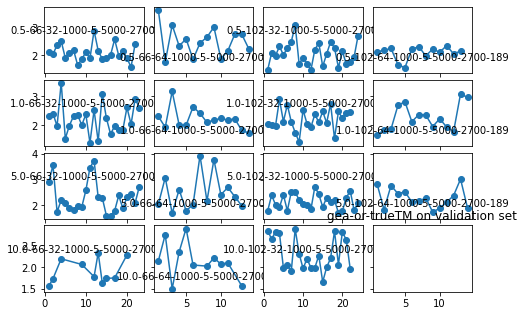

In [57]:
fig,ax=plt.subplots(4,4,sharex='col',sharey='row')#,linkIdx+1)#,sharex='col',sharey='row')

# fig2,ax2=plt.subplots(15,4,sharex='col',sharey='row')#,linkIdx+1)#,sharex='col',sharey='row')
plt.subplots_adjust(left=0.01,  # left，right，top 和 bottom 参数指定了子图的四个边的位置。它们是图形的宽度和高度的比例
                    bottom=0.01, 
                    right=1, 
                    top=1, 
                    wspace=0.1, 
                    hspace=0.1)
axIndex = -1
for modelName,data in means_pr.items():
    axIndex+=1
    if axIndex <40:
        ax[axIndex//4,axIndex%4].plot( data.keys(),data.values(),marker = "o")
        ax[axIndex//4,axIndex%4].set_title(f"{modelName}",fontsize=10,y=0.1 if axIndex%2 else 0.5)
#         print(f"model {modelName} with {len(data.keys())} data points")
    else:
        break
# fig.legend([\

#             'rl',\
#             # 'lp',\
#             # 'ospf'\
#            ])
plt.title("gea-or-trueTM on validation set")
plt.savefig("gea-or-trueTM训练记录(小bata).jpg")
save_obj(means_pr,"means_pr-gea-or-trueTM(small beta)")

# 查看test结果

## GEA

In [64]:
parDir="/home/hesy/projects/mars/DRLTE_g3/log/test/"
for _dir in os.listdir(parDir):
    prs = np.loadtxt(os.path.join(parDir,_dir,"perfm.log") )
    print(f"meanPF of {_dir} is {mean(prs)}")

meanPF of GEA-trueTM-0.05-66-64-1000-5-5000-2700-189-12 is 1.5289105549200446
meanPF of GEA-trueTM-0.01-102-32-1000-5-5000-2700-189-25 is 1.3699064042400204
meanPF of GEA-trueTM-0.001-66-32-1000-5-5000-2700-189-21 is 1.4367675896947099


In [65]:
parDir="/home/hesy/projects/mars/DRLTE_g5/log/test/"
for _dir in os.listdir(parDir):
    prs = np.loadtxt(os.path.join(parDir,_dir,"perfm.log") )
    print(f"meanPF of {_dir} is {mean(prs)}")

meanPF of GEA-trueTM-1.0-66-32-1000-5-5000-2700-189-11 is 1.6433306918340918
meanPF of GEA-trueTM-1.0-102-32-1000-5-5000-2700-189-9 is 1.6871458069318959
meanPF of GEA-trueTM-1.0-66-32-1000-5-5000-2700-189-13 is 1.9210455013990395


# backup codes

## 断点续上训练

In [173]:
# 遍历当前文件夹下每一个目录, 找出ckpoint最大的文件
path= "/home/hesy/pro/mars/DRLTE/log/ckpoint"
import os
from os import path as osp

def findLatest(rootPath):
    dirs_ = os.listdir(rootPath)
    d2i = dict()    # short for dir2idx
    for dir_ in dirs_:
        if not osp.isdir(osp.join(rootPath,dir_)):
            print(f"{dir_} is not a dir")
            continue
        maxNum, max_index= 0 ,'ckpt'
        for file_ in os.listdir(osp.join(rootPath,dir_)):
            if file_.endswith("index"):
                curIdx = file_.split('.')[0]
                if int(curIdx.split('-')[-1]) >maxNum:
                    maxNum, max_index= int(curIdx.split('-')[-1]) ,curIdx
        d2i[dir_]=max_index
        
    return d2i
        
dir2idx =findLatest(path)
print(f"len is {len(dir2idx)}, and they are:\n{dir2idx}")

gea-collected-0504-ckpt.tgz is not a dir
len is 16, and they are:
{'GEA-66-16-1000-5-0-9437-0': 'ckpt-170000', 'GEA-102-16-1000-5-0-9437-0': 'ckpt-200000', 'GEA-66-16-1000-5-5000-2700-189': 'ckpt-170000', 'GEA-102-16-1000-5-5000-2700-189': 'ckpt-170000', 'GEA-102-16-100-5-500-2700-189': 'ckpt-180000', 'GEA-66-64-1000-5-5000-2700-189': 'ckpt-60000', 'GEA-66-16-100-5-0-9437-0': 'ckpt-170000', 'GEA-66-16-100-5-500-2700-189': 'ckpt-190000', 'GEA-102-16-100-5-0-9437-0': 'ckpt-190000', 'GEA-102-64-1000-5-5000-2700-189': 'ckpt-60000', 'GEA-66-64-100-5-500-2700-189': 'ckpt-70000', 'GEA-102-64-1000-5-0-9437-0': 'ckpt-60000', 'GEA-102-64-100-5-0-9437-0': 'ckpt-60000', 'GEA-66-64-1000-5-0-9437-0': 'ckpt-60000', 'GEA-66-64-100-5-0-9437-0': 'ckpt-60000', 'GEA-102-64-100-5-500-2700-189': 'ckpt-60000'}


In [ ]:
import subprocess
cmdPath = "/home/hesy/pro/mars/DRLTE/drlte"
cmdFile="run_train_new_0428.sh"
for key,value in dir2idx.items():
    paras = key.split('-')
    ckptPath = osp.join('/home/hesy/pro/mars/DRLTE/log/ckpoint',key,value)
#     print(f"cd {cmdPath} && bash {cmdFile} {paras[1]} {paras[2]} {paras[3]} {paras[4]} {paras[5]} {paras[6]} {paras[7]} {paras[0]} {ckptPath}")
    print(subprocess.getoutput(f"cd {cmdPath} && bash {cmdFile} {paras[1]} {paras[2]} {paras[3]} {paras[4]} {paras[5]} {paras[6]} {paras[7]} {paras[0]} {ckptPath}"))
